<a href="https://colab.research.google.com/github/Mohachtou/projet-Data-Camp/blob/main/Projet%20machine%20learning%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#importer les bibliothéque necessaire pour faire l'étude de la data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
#afficher la donné e
data=pd.read_csv('titanic.csv')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [39]:
#les dimension de la data 
data.shape

(891, 15)

In [40]:
#afficher les 4 premier ligne de la donnée 
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
# eliminer les colonne unitile 
data=data[['survived','pclass','sex','age']]
data.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [42]:
# la description de notre data sets (moyen, min , les gens qui sont surviver )
data.describe()
#la on peux consulter qu les donnéer sans manquante dans la colonne age 

,survived,pclass,age
count,891.000000,891.000000,714.000000
mean,0.383838,2.308642,29.699118
std,0.486592,0.836071,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,2.000000,20.125000
50%,0.000000,3.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


In [43]:
# on a eliminer la donné manquante 
data=data.dropna(axis=0)
data.describe()

,survived,pclass,age
count,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118
std,0.491460,0.838250,14.526497
min,0.000000,1.000000,0.420000
25%,0.000000,1.000000,20.125000
50%,0.000000,2.000000,28.000000
75%,1.000000,3.000000,38.000000
max,1.000000,3.000000,80.000000


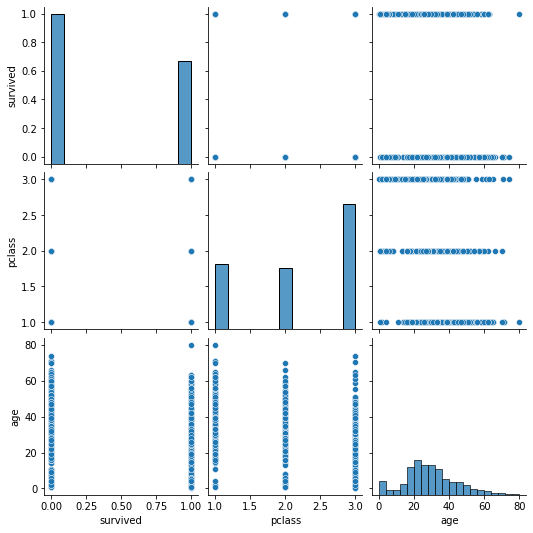

In [44]:
# visualisation des données avec la bibliothéque seaborn 
sns.pairplot(data )

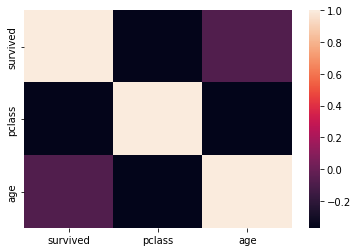

In [45]:
# on essaiye de trouver des coorelationa entre les donnée pour fair eplus parler la donnée 
sns.heatmap(data.corr())

In [46]:
#importer la bibliothéque necessaire pour faire des split train et test 
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt


In [47]:
# on definie notre X et notre y 
y=data['survived']
X=data.drop('survived',axis=1)


In [48]:
#on split la donner sur des donnée test et des donnée train 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print('Train set', X_train.shape)
print('Test set ',X_test.shape)


Train set (571, 3)
Test set  (143, 3)


In [49]:
#importer la bibliothéque du modele à entrainer 
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
#entrainer un model de classification 
model=KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)

In [53]:
#import Grid Search
from sklearn.model_selection import GridSearchCV


In [ ]:
#trouver le meilleur parametre K (euclidian or manhatan)
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

In [ ]:
#voir les meilleur parametre 
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
model = grid.best_estimator_
model.score(X_test, y_test)

In [ ]:
#import bibliothéque de matrix confusion 
from sklearn.metrics import confusion_matrix


In [ ]:
#matrix de confusion 
confusion_matrix(y_test, model.predict(X_test))

In [ ]:
#importer la bibliothéque learning Curve 
from sklearn.model_selection import learning_curve


In [ ]:
#savoir choisir les meilleur hyper paramettre pour ne pas tombe dans le overfitting 
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()